# Lecture 4: Finite Difference Method for Electromagnetic Fields

The Finite Difference Method (FDM) is a numerical technique used to solve partial differential equation (PDE) problems. It approximates the derivatives in a PDE with discrete difference quotients, transforming the continuous PDE into a system of algebraic equations that can be solved computationally.

## Example 1: 2D Poisson Equation

**Problem Statement**: We will write a code to solve the 2D Poisson equation in a rectangular domain with Dirichlet boundary conditions. The Poisson equation is a second-order elliptic partial differential equation that describes the potential field $\phi$ in a region of space with a given charge density $\rho$:

$$
\nabla^2 \phi = \frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} = -\frac{\rho}{\epsilon_0}
$$

where:
- $\nabla^2$ is the Laplacian operator.
- $\epsilon_0$ is the permittivity of free space.
- $\rho$ is the charge density.

**Gauss-Seidel Equation**: The Gauss-Seidel method is an iterative numerical technique used to solve linear systems of equations. In this context, it is used to solve the Poisson equation, which is a second-order elliptic partial differential equation. The Gauss-Seidel equation for updating the potential field $\phi$ at each interior grid point is given by:

$$
\phi_{i,j}^{(k+1)} = \frac{1}{4} \left(\phi_{i+1,j}^{(k)} + \phi_{i-1,j}^{(k)} + \phi_{i,j+1}^{(k)} + \phi_{i,j-1}^{(k)}\right)
$$

where:
- $\phi_{i,j}^{(k+1)}$ is the updated potential at grid point $(i, j)$ after the $(k+1)$-th iteration.
- $\phi_{i+1,j}^{(k)}$, $\phi_{i-1,j}^{(k)}$, $\phi_{i,j+1}^{(k)}$, and $\phi_{i,j-1}^{(k)}$ are the neighboring potential values at the $(k)$-th iterations.

**Plotting and Animation**: 
- We will use the `matplotlib.pyplot.contourf` library to plot the potential field $\phi$.
- And we will use `display`, `clear_output` from the `IPython.display` library to animate the potential field $\phi$.

### 1.1 Laplace Equation

For $\rho = 0$, the Poisson equation reduces to the Laplace equation:

$$
\nabla^2 \phi = \frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} = 0
$$

Write `set_boundary` and `GS_laplace_step` functions to implement the Gauss-Seidel method for solving the Laplace equation in a rectangular domain with Dirichlet boundary conditions.

In [1]:
import numpy as np

def set_boundary(x, y):
    # Initialize the potential field and boundary conditions
    phi = np.zeros((len(x), len(y)))
    phi[0, :] = 1.0  # Boundary condition at y=0
    phi[-1, :] = np.sin(4*np.pi*x/np.max(x))  # Boundary condition at y=L
    phi[:, 0] = -1.0  # Boundary condition at x=0
    phi[:, -1] = 0.0  # Boundary condition at x=L
    return phi

def GS_laplace_step(phi):
    Nx, Ny = phi.shape
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            phi[i, j] = 0.25 * (phi[i + 1, j] + phi[i - 1, j] + phi[i, j + 1] + phi[i, j - 1])
    return phi

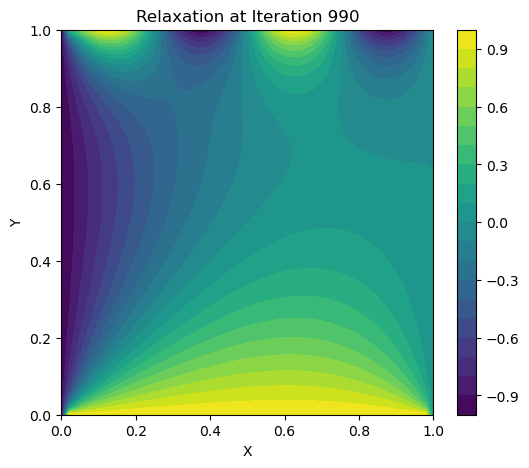

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Constants
L = 1.0  # Length of the domain
N = 50  # Number of grid points
dx = L / N  # Spatial step size

# Create a grid
x = np.linspace(0, L, N)
y = np.linspace(0, L, N)
X, Y = np.meshgrid(x, y)

# set boundary
phi = set_boundary(x, y)

# Main FDM loop to solve the Poisson equation
num_iterations = 1000

# List to store potential field at different time steps
phi_history = []

for iteration in range(num_iterations):
    phi = GS_laplace_step(phi)
    
    # Save a copy of the current potential field for visualization
    phi_history.append(phi.copy())

# Plot the relaxation process
fig, ax = plt.subplots(figsize = (6,5))
cbar = None
for t in range(len(phi_history)):
    if t % 10 == 0:
        ax.clear()
        im = ax.contourf(X, Y, phi_history[t], levels=20, cmap='viridis')
        ax.set_title(f'Relaxation at Iteration {t}')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        if cbar is not None:
            cbar.remove()
        cbar = fig.colorbar(im, ax=ax)
        display(fig)
        clear_output(wait=True)

### 1.2 Poisson Equation

For $\rho \neq 0$, the Poisson equation is a non-homogeneous PDE. We can solve the Poisson equation by solving the Laplace equation for the potential field $\phi$ and then adding the particular solution $\phi_p$ to satisfy the non-homogeneous term $\rho$:

$$
\nabla^2 \phi_p = -\frac{\rho}{\epsilon_0}
$$

Write a `set_charge` function to set the charge density $\rho$ in the domain. Then write a `GS_poisson_step` function to implement the Gauss-Seidel method for solving the Poisson equation in a rectangular domain with Dirichlet boundary conditions.

In [3]:
import numpy as np

def set_boundary(x, y):
    # Initialize the potential field and boundary conditions
    phi = np.zeros((len(x), len(y)))
    phi[0, :] = 1.0  # Boundary condition at y=0
    phi[-1, :] = np.sin(4*np.pi*x/np.max(x))  # Boundary condition at y=L
    phi[:, 0] = -1.0  # Boundary condition at x=0
    phi[:, -1] = 0.0  # Boundary condition at x=L
    return phi

def set_charge(x, y):
    N = len(x)
    rho = np.zeros((N, N))
    rho[N//4:3*N//4, N//4:3*N//4] = -2.0  # Charge density
    return rho

def GS_poisson_step(phi, rho):
    Nx, Ny = phi.shape
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            phi[i, j] = 0.25 * (phi[i + 1, j] + phi[i - 1, j] + phi[i, j + 1] + phi[i, j - 1]) - np.pi * dx**2 * rho[i, j]
    return phi

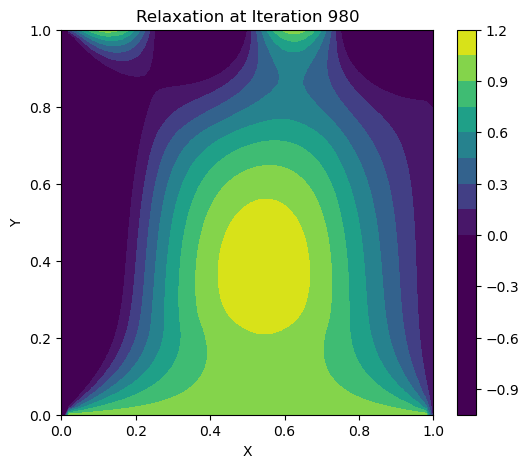

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Constants
L = 1.0  # Length of the domain
N = 50  # Number of grid points
dx = L / N  # Spatial step size

# Create a grid
x = np.linspace(0, L, N)
y = np.linspace(0, L, N)
X, Y = np.meshgrid(x, y)

# Initialize the potential field and boundary conditions
rho = set_charge(x, y)

phi = set_boundary(x, y)

# Main FDM loop to solve the Poisson equation
num_iterations = 1000

# List to store potential field at different time steps
phi_history = []

for iteration in range(num_iterations):
    phi = GS_poisson_step(phi, rho)
    
    # Save a copy of the current potential field for visualization
    phi_history.append(phi.copy())

# Plot the relaxation process
fig, ax = plt.subplots(figsize = (6,5))
cbar = None
for t in range(len(phi_history)):
    if t % 20 == 0:
        ax.clear()
        im = ax.contourf(X, Y, phi_history[t], levels=20, cmap='viridis')
        ax.set_title(f'Relaxation at Iteration {t}')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        im.set_clim([0, 1.2])
        if cbar is not None:
            cbar.remove()
        cbar = fig.colorbar(im, ax=ax)
        display(fig)
        clear_output(wait=True)

## Example 2: Simulate Electromagnetic Field with FDTD

The Finite-Difference Time-Domain (FDTD) method is particularly well-suited for solving Maxwell's equations because it directly discretizes both space and time, allowing for a straightforward and intuitive numerical solution to these fundamental equations of electromagnetism.

Maxwell's equations are a set of four differential equations that describe the behavior of electric and magnetic fields in space and time. These equations can be summarized as follows:

1. Gauss's Law for Electricity:
   $$\nabla \cdot \mathbf{E} = \frac{\rho}{\varepsilon_0}$$

2. Gauss's Law for Magnetism:
   $$\nabla \cdot \mathbf{B} = 0$$

3. Faraday's Law of Electromagnetic Induction:
   $$\nabla \times \mathbf{E} = -\frac{\partial \mathbf{B}}{\partial t}$$

4. Ampère's Law with Maxwell's Addition:
   $$\nabla \times \mathbf{B} = \mu_0 \mathbf{J} + \mu_0 \varepsilon_0 \frac{\partial \mathbf{E}}{\partial t}$$

Here, $\mathbf{E}$ represents the electric field, $\mathbf{B}$ is the magnetic field, $\rho$ is the charge density, $\mathbf{J}$ is the current density, and $\varepsilon_0$ and $\mu_0$ are the permittivity and permeability of free space, respectively.

The FDTD method discretizes space and time using a grid, such as the Yee grid, and updates the electric and magnetic fields at each grid point at discrete time steps. The core FDTD update equations are as follows:

For the electric field ($\mathbf{E}$):
   $$\mathbf{E}(i,j,k,t+\Delta t) = \mathbf{E}(i,j,k,t) + \frac{\Delta t}{\varepsilon(i,j,k)} \nabla \times \mathbf{H}(i,j,k,t)$$

For the magnetic field ($\mathbf{H}$):
   $$\mathbf{H}(i,j,k,t+\Delta t) = \mathbf{H}(i,j,k,t) - \frac{\Delta t}{\mu(i,j,k)} \nabla \times \mathbf{E}(i,j,k,t+\Delta t)$$

Here, $\Delta t$ is the time step, $\varepsilon(i,j,k)$ and $\mu(i,j,k)$ represent the permittivity and permeability of the material at grid point $(i, j, k)$, and $\nabla \times$ represents the curl operator.

The FDTD method approximates the spatial derivatives using finite differences and advances the fields in time, making it well-suited for solving Maxwell's equations numerically. By updating the fields at each grid point over time, FDTD simulations provide a comprehensive and accurate representation of how electromagnetic waves propagate, reflect, and interact with materials and structures in a computational domain. This method is particularly valuable for understanding a wide range of electromagnetic phenomena, from wave propagation to antenna design and photonic device analysis.

### 2.1 1D FDTD Simulation

We will first start with a 1D simulation using the Finite-Difference Time-Domain (FDTD) method to solve Maxwell's equations. In particular, it models the propagation of electromagnetic waves in a 1D space. The key equations implemented in the code are:

1. **Update of the Magnetic Field (Hy):**

   $$
   H_y^{n+\frac{1}{2}}(i) = H_y^{n-\frac{1}{2}}(i) + \frac{c\Delta t}{\Delta x} (E_z^n(i+1) - E_z^n(i))
   $$

   This equation updates the magnetic field Hy at each spatial grid point (i) and each time step (n). It calculates the change in Hy based on the change in the electric field Ez at neighboring grid points.

2. **Source Excitation (Gaussian Pulse):**

   $$
   E_z(i) = A \cdot \exp\left(-\left(\frac{(n-30)\Delta t}{\tau}\right)^2\right) \cdot \sin(2\pi f\Delta t)
   $$

   This equation represents the source excitation applied to the electric field Ez at the source position. It generates a Gaussian pulse that varies with time and is multiplied by a sine wave to introduce electromagnetic waves into the simulation.

3. **Update of the Electric Field (Ez):**

   $$
   E_z^{n+1}(i) = E_z^n(i) + \frac{c\Delta t}{\Delta x} (H_y^{n+\frac{1}{2}}(i) - H_y^{n+\frac{1}{2}}(i-1))
   $$

   This equation updates the electric field Ez at each spatial grid point (i) and each time step (n). It calculates the change in Ez based on the change in the magnetic field Hy at neighboring grid points.

The simulation proceeds through a series of time steps, and at each step, it updates the magnetic field, applies the source excitation, and updates the electric field.


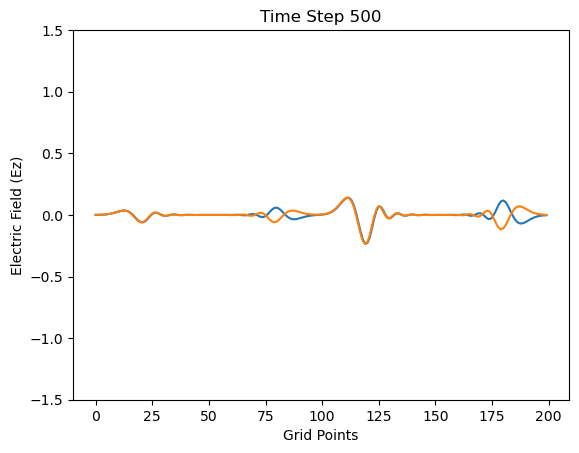

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Constants
c = 299792458  # Speed of light (m/s)
dx = 0.01      # Spatial step size (m)
dt = dx / (2 * c)  # Temporal step size (s)
num_steps = 500
source_position = 50  # Position of the source in the grid
source_frequency = 1e9  # Frequency of the source (Hz)

# Grid initialization
grid_size = 200
ez = np.zeros(grid_size)  # Electric field
hy = np.zeros(grid_size)  # Magnetic field

# Create a figure for plotting
fig, ax = plt.subplots()

# Main FDTD loop
for time_step in range(1, num_steps + 1):
    # Update magnetic field
    hy[:-1] += (ez[1:] - ez[:-1]) * (c * dt / dx)

    # Source excitation (Gaussian pulse)
    ez[source_position] = np.exp(-((time_step - 30) / 10) ** 2) * np.sin(2 * np.pi * source_frequency * time_step * dt)

    # Update electric field
    ez[1:] += (hy[1:] - hy[:-1]) * (c * dt / dx)

    # Plot the electric field every 10 time steps
    if time_step % 10 == 0:
        ax.clear()
        ax.plot(ez)
        ax.plot(hy)
        ax.set_title(f'Time Step {time_step}')
        ax.set_xlabel('Grid Points')
        ax.set_ylabel('Electric Field (Ez)')
        ax.set_ylim(-1.5, 1.5)
        display(fig)
        clear_output(wait=True)



**Questions**:

1. What are $E_z$ and $H_y$ in-phase and out-of-phase?
3. What happened to $E_z$ and $H_y$ at the boundaries?
4. Try changing the frequency/amplitude of the source excitation. What happens when the frequency/amplitude is too high or too low?
5. Try adding a second source excitation. What happens when the two waves collide?
6. Try changing the material properties of the medium. What happens when the permittivity/permeability is too high or too low?

### 2.2 2D FDTD Wave Simulation

<ins>Reference</ins>: Create Your Own Finite Difference Wave Equation Simulation (With Python), Philip Mocz (2023), @PMocz

This code simulates the wave equation using the Finite Difference method. The wave equation is a partial differential equation that describes wave propagation. In this simulation, we model a 2D grid where waves evolve over time.

## Simulation Parameters

- `N`: Resolution of the grid.
- `boxsize`: Size of the simulation box.
- `c`: Wave speed.
- `t`: Initial time.
- `tEnd`: Time to stop the simulation.
- `plotRealTime`: A flag for plotting the simulation in real-time.

## Discretization

- `dx`: Spatial step size in the x and y directions.
- `dt`: Temporal step size.
- `aX` and `aY`: Axis indices.
- `R` and `L`: Right and left indices for spatial shifts.
- `fac`: A coefficient related to time and spatial steps.

## Mesh and Initial Conditions

- `xlin`: Create a linear space for the x-coordinate.
- `Y` and `X`: Meshgrid for 2D coordinates.

## Initial Conditions and Mask

- `U`: Initialize the field variable on the grid.
- `mask`: Create a mask for boundary conditions.

## Simulation Loop

The code enters the main simulation loop, where the wave equation is solved step by step.

1. **Calculate the Laplacian:**

   $$\text{laplacian} = (ULX + ULY - 4U + URX + URY)$$

   Here, `ULX`, `URX`, `ULY`, and `URY` are shifted versions of `U` representing neighboring points in the grid.

2. **Update the Field Variable (U):**

   $$U_{\text{new}} = 2U - U_{\text{prev}} + \text{fac} \times \text{laplacian}$$

   This equation updates the field variable at each grid point.

3. **Apply Boundary Conditions:**

   The code enforces boundary conditions. For example, the boundaries are set to zero, and a specific source term is applied at the boundary.

4. **Update Time and Plot:**

   The simulation time is advanced, and the field is plotted in real-time. The `clear_output` function is used to clear the previous plot.

This simulation models the evolution of waves in a 2D space, and the visualization provides insights into how waves propagate and interact within the defined boundaries. The grid and parameters can be adjusted to study various wave phenomena.


Discretize Space

$$
\nabla^2 U \simeq \frac{U_{i+1, j}^{(n)}+U_{i, j+1}^{(n)}-4 U_{i, j}^{(n)}+U_{i-1, j}^{(n)}+U_{i, j-1}^{(n)}}{(\Delta x)^2}
$$

Discretize Time

$$
\frac{\partial^2 U}{\partial t^2} \simeq \frac{U_{i, j}^{(n+1)}-2 U_{i, j}^{(n)}+U_{i, j}^{(n-1)}}{(\Delta t)^2}
$$

The final discretization is:

$$
U_{i, j}^{(n+1)}=2 U_{i, j}^{(n)}-U_{i, j}^{(n-1)}+\left(\frac{c \Delta t}{\Delta x}\right)^2\left(U_{i+1, j}^{(n)}+U_{i, j+1}^{(n)}-4 U_{i, j}^{(n)}+U_{i-1, j}^{(n)}+U_{i, j-1}^{(n)}\right)
$$

Timestep is chosen to be

$$
\Delta t \leq \frac{\sqrt{2}}{2} \frac{\Delta x}{c}
$$

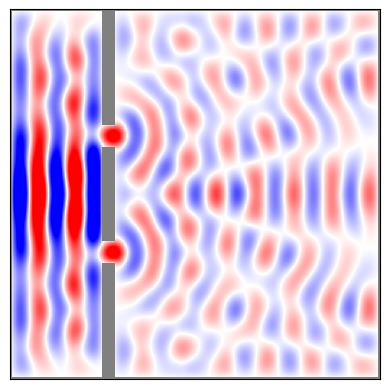

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

# Simulation parameters
N = 256   # Resolution
boxsize = 1.    # Box size
c = 1.    # Wave speed
t = 0     # Time
tEnd = 2.    # Stop time
plotRealTime = True  # Switch for plotting simulation in real-time

# Mesh
dx = boxsize / N
dt = (np.sqrt(2)/2) * dx / c
aX = 0   # x-axis
aY = 1   # y-axis
R = -1   # Right
L = 1    # Left
fac = dt**2 * c**2 / dx**2

xlin = np.linspace(0.5*dx, boxsize-0.5*dx, N)
Y, X = np.meshgrid(xlin, xlin)

# Generate Initial Conditions & mask
U = np.zeros((N, N))
mask = np.zeros((N, N), dtype=bool)
mask[0, :]  = True
mask[-1, :] = True
mask[:, 0]  = True
mask[:, -1] = True
mask[int(N/4):int(N*9/32), :N-1]     = True
mask[1:N-1, int(N*5/16):int(N*3/8)]  = False
mask[1:N-1, int(N*5/8):int(N*11/16)] = False
U[mask] = 0
Uprev = 1. * U

# Prepare the figure
fig = plt.figure(figsize=(6, 6), dpi=80)
cmap = plt.cm.bwr
cmap.set_bad('gray')
outputCount = 1
time_step = 0

# Simulation Main Loop
while t < tEnd:
    
    # Calculate the Laplacian 
    ULX = np.roll(U, L, axis=aX)
    URX = np.roll(U, R, axis=aX)
    ULY = np.roll(U, L, axis=aY)
    URY = np.roll(U, R, axis=aY)
    
    laplacian = (ULX + ULY - 4*U + URX + URY)
    
    # Update U
    Unew = 2 * U - Uprev + fac * laplacian
    Uprev = 1. * U
    U = 1. * Unew
    
    # Apply boundary conditions (Dirichlet/inflow)
    U[mask] = 0
    U[0, :] = np.sin(20*np.pi*t) * np.sin(np.pi*xlin)**2
    
    # Update time
    t += dt
    
    # Plot the electric field every 10 time steps
    if time_step % 1 == 0:
        Uplot = 1. * U
        Uplot[mask] = np.nan
        ax = plt.gca()
        plt.imshow(Uplot.T, cmap=cmap)
        ax.invert_yaxis()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)    
        ax.set_aspect('equal')
        plt.clim(-3, 3)
        plt.pause(0.001)
        outputCount += 1
        clear_output(wait=True)
    
    time_step += 1


**Questions**:
1. Can you see the interference pattern?
2. Try changing the frequency of the source excitation. What happens when the frequency is too high or too low?
3. Try changing the width of the slits. What happens when the slits are too wide or too narrow?

## creating banner

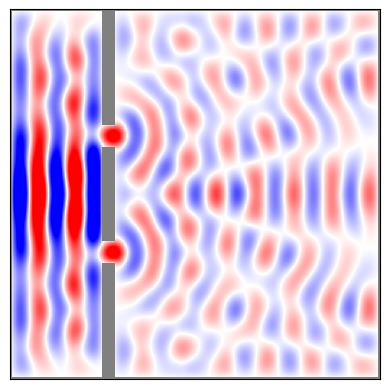

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

# Simulation parameters
N = 256   # Resolution
boxsize = 1.    # Box size
c = 1.    # Wave speed
t = 0     # Time
tEnd = 2.    # Stop time
plotRealTime = True  # Switch for plotting simulation in real-time

# Mesh
dx = boxsize / N
dt = (np.sqrt(2)/2) * dx / c
aX = 0   # x-axis
aY = 1   # y-axis
R = -1   # Right
L = 1    # Left
fac = dt**2 * c**2 / dx**2

xlin = np.linspace(0.5*dx, boxsize-0.5*dx, N)
Y, X = np.meshgrid(xlin, xlin)

# Generate Initial Conditions & mask
U = np.zeros((N, N))
mask = np.zeros((N, N), dtype=bool)
mask[0, :]  = True
mask[-1, :] = True
mask[:, 0]  = True
mask[:, -1] = True
mask[int(N/4):int(N*9/32), :N-1]     = True
mask[1:N-1, int(N*5/16):int(N*3/8)]  = False
mask[1:N-1, int(N*5/8):int(N*11/16)] = False
U[mask] = 0
Uprev = 1. * U

# Prepare the figure
fig = plt.figure(figsize=(6, 6), dpi=80)
cmap = plt.cm.bwr
cmap.set_bad('gray')
outputCount = 1
time_step = 0

# Simulation Main Loop
while t < tEnd:
    
    # Calculate the Laplacian 
    ULX = np.roll(U, L, axis=aX)
    URX = np.roll(U, R, axis=aX)
    ULY = np.roll(U, L, axis=aY)
    URY = np.roll(U, R, axis=aY)
    
    laplacian = (ULX + ULY - 4*U + URX + URY)
    
    # Update U
    Unew = 2 * U - Uprev + fac * laplacian
    Uprev = 1. * U
    U = 1. * Unew
    
    # Apply boundary conditions (Dirichlet/inflow)
    U[mask] = 0
    U[0, :] = np.sin(20*np.pi*t) * np.sin(np.pi*xlin)**2
    
    # Update time
    t += dt
    
    # Plot the electric field every 10 time steps
    if time_step % 1 == 0:
        Uplot = 1. * U
        Uplot[mask] = np.nan
        ax = plt.gca()
        plt.imshow(Uplot.T, cmap=cmap)
        ax.invert_yaxis()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)    
        ax.set_aspect('equal')
        plt.clim(-3, 3)
        plt.pause(0.001)
        outputCount += 1
        clear_output(wait=True)
    
    time_step += 1


In [70]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

def generate_mask():
        
    # Parameters
    Ny = 256  # Adjust as needed
    Nx = 3 * Ny  # Adjust as needed
    boxsize = 250.0  # Adjust as needed
    dx = boxsize / N

    # Create the domain
    ylin = np.linspace(0.5 * dx, boxsize - 0.5 * dx, Ny)
    xlin = np.linspace(0.5 * dx, 3 * boxsize - 0.5 * dx, Nx)
    Y, X = np.meshgrid(ylin, xlin)

    # Generate Initial Conditions & mask
    U = np.zeros((Ny, Nx))
    mask = np.zeros((Ny, Nx), dtype=bool)

    # Create an image with the text "PHY653"
    text = "ฟสก.๖๕๓"
    font_size = 250  # Adjust as needed
    image_size = (Nx, Ny)
    image = Image.new('L', image_size, 0)
    draw = ImageDraw.Draw(image)

    # Use a default font
    try:
        font = ImageFont.truetype("THSarabunNew.ttf", font_size)
        print("Font loaded successfully")
    except IOError:
        font = ImageFont.load_default()
        # font = ImageFont.truetype(font.getname()[0], font_size)

    # Calculate the position to center the text
    bbox = draw.textbbox((0, 0), text, font=font)
    text_width = bbox[2] - bbox[0]
    text_height = bbox[3] - bbox[1]
    position = ((image_size[0] - text_width) // 2, (image_size[1] - text_height) // 2 - 70)

    # Draw the text on the image
    draw.text(position, text, fill=255, font=font)

    # Convert the image to a NumPy array and create the mask
    text_mask = np.array(image) > 0
    # print(text_mask.shape, mask.shape)
    mask[text_mask] = True

    # Apply boundary conditions
    mask[0, :] = True
    mask[-1, :] = True
    mask[:, 0] = True
    mask[:, -1] = True

    return mask


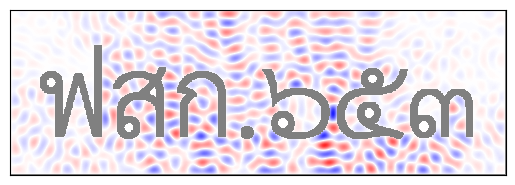

In [80]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

# Simulation parameters
Ny = 256   # Resolution
Nx = Ny * 3   # Resolution
boxsize = 1.    # Box size
c = 1.    # Wave speed
t = 0     # Time
tEnd = 2.    # Stop time
plotRealTime = True  # Switch for plotting simulation in real-time

# Mesh
dy = boxsize / Ny
dx = dy
dt = (np.sqrt(2)/2) * dx / c
aX = 0   # x-axis
aY = 1   # y-axis
R = -1   # Right
L = 1    # Left
fac = dt**2 * c**2 / dx**2

xlin = np.linspace(0.5*dx, boxsize-0.5*dx, Nx)
ylin = np.linspace(0.5*dy, 3 * boxsize-0.5*dy, Ny)
Y, X = np.meshgrid(ylin, xlin)

# Generate Initial Conditions & mask
U = np.zeros((Nx, Ny))
# mask = np.zeros((Nx, Ny), dtype=bool)
# mask[0, :]  = True
# mask[-1, :] = True
# mask[:, 0]  = True
# mask[:, -1] = True
# mask[int(Nx/4):int(Ny*9/32), :Ny-1]     = True
# mask[1:Nx-1, int(Ny*5/16):int(Ny*3/8)]  = False
# mask[1:Nx-1, int(Ny*5/8):int(Ny*11/16)] = False
mask = generate_mask().T
mask = mask[:,::-1]
# print(mask.shape, U.shape)
U[mask] = 0
Uprev = 1. * U

# Prepare the figure
fig = plt.figure(figsize=(6, 6), dpi=80)
cmap = plt.cm.bwr
cmap.set_bad('gray')
outputCount = 1
time_step = 0

# Simulation Main Loop
while t < tEnd:
    
    # Calculate the Laplacian 
    ULX = np.roll(U, L, axis=aX)
    URX = np.roll(U, R, axis=aX)
    ULY = np.roll(U, L, axis=aY)
    URY = np.roll(U, R, axis=aY)
    
    laplacian = (ULX + ULY - 4*U + URX + URY)
    
    # Update U
    Unew = 2 * U - Uprev + fac * laplacian
    Uprev = 1. * U
    U = 1. * Unew
    
    # Apply boundary conditions (Dirichlet/inflow)
    U[mask] = 0
    # print(xlin.shape, U.shape)
    U[:, 0] = np.sin(20*np.pi*t) * np.sin(np.pi*xlin)**2
    
    # Update time
    t += dt
    
    # Plot the electric field every 10 time steps
    if time_step % 1 == 0:
        Uplot = 1. * U
        Uplot[mask] = np.nan
        ax = plt.gca()
        plt.imshow(Uplot.T, cmap=cmap)
        ax.invert_yaxis()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)    
        ax.set_aspect('equal')
        plt.clim(-3, 3)
        plt.pause(0.001)
        outputCount += 1
        clear_output(wait=True)
    
    time_step += 1
# plt.savefig('chap4-interference.png', dpi=300, bbox_inches='tight')

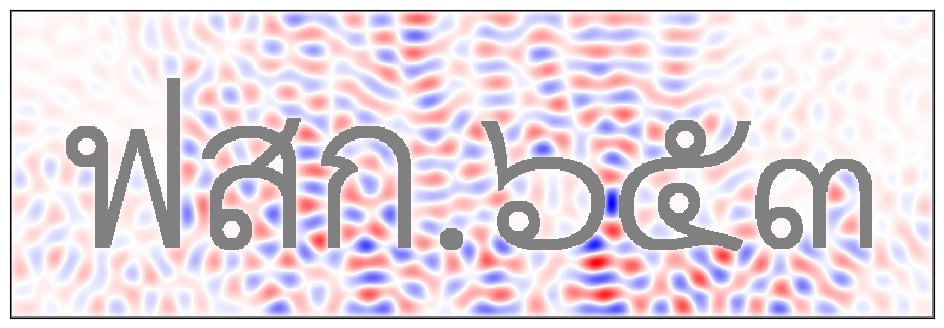

In [90]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.imshow(Uplot.T, cmap=cmap)
ax.invert_yaxis()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)    
ax.set_aspect('equal')
plt.savefig('chap4-interference.png', dpi=300, bbox_inches='tight')
# plt.show()

In [77]:
plt.savefig('chap4-interference.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

Font loaded successfully


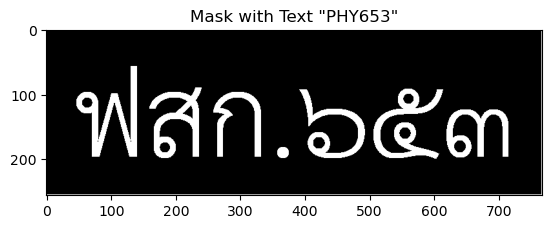

In [69]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# Parameters
Ny = 256  # Adjust as needed
Nx = 3 * Ny  # Adjust as needed
boxsize = 250.0  # Adjust as needed
dx = boxsize / N

# Create the domain
ylin = np.linspace(0.5 * dx, boxsize - 0.5 * dx, Ny)
xlin = np.linspace(0.5 * dx, 3 * boxsize - 0.5 * dx, Nx)
Y, X = np.meshgrid(ylin, xlin)

# Generate Initial Conditions & mask
U = np.zeros((Ny, Nx))
mask = np.zeros((Ny, Nx), dtype=bool)

# Create an image with the text "PHY653"
text = "ฟสก.๖๕๓"
font_size = 250  # Adjust as needed
image_size = (Nx, Ny)
image = Image.new('L', image_size, 0)
draw = ImageDraw.Draw(image)

# Use a default font
try:
    font = ImageFont.truetype("THSarabunNew.ttf", font_size)
    print("Font loaded successfully")
except IOError:
    font = ImageFont.load_default()
    # font = ImageFont.truetype(font.getname()[0], font_size)

# Calculate the position to center the text
bbox = draw.textbbox((0, 0), text, font=font)
text_width = bbox[2] - bbox[0]
text_height = bbox[3] - bbox[1]
position = ((image_size[0] - text_width) // 2, (image_size[1] - text_height) // 2 - 70)

# Draw the text on the image
draw.text(position, text, fill=255, font=font)

# Convert the image to a NumPy array and create the mask
text_mask = np.array(image) > 0
# print(text_mask.shape, mask.shape)
mask[text_mask] = True

# Apply boundary conditions
mask[0, :] = True
mask[-1, :] = True
mask[:, 0] = True
mask[:, -1] = True

# Visualize the mask
plt.imshow(mask, cmap='gray')
plt.title('Mask with Text "PHY653"')
plt.show()

In [ ]:
def generate_mask():
        
    # Parameters
    Ny = 256  # Adjust as needed
    Nx = 3 * Ny  # Adjust as needed
    boxsize = 250.0  # Adjust as needed
    dx = boxsize / N

    # Create the domain
    ylin = np.linspace(0.5 * dx, boxsize - 0.5 * dx, Ny)
    xlin = np.linspace(0.5 * dx, 3 * boxsize - 0.5 * dx, Nx)
    Y, X = np.meshgrid(ylin, xlin)

    # Generate Initial Conditions & mask
    U = np.zeros((Ny, Nx))
    mask = np.zeros((Ny, Nx), dtype=bool)

    # Create an image with the text "PHY653"
    text = "ฟสก.๖๕๓"
    font_size = 250  # Adjust as needed
    image_size = (Nx, Ny)
    image = Image.new('L', image_size, 0)
    draw = ImageDraw.Draw(image)

    # Use a default font
    try:
        font = ImageFont.truetype("THSarabunNew.ttf", font_size)
        print("Font loaded successfully")
    except IOError:
        font = ImageFont.load_default()
        # font = ImageFont.truetype(font.getname()[0], font_size)

    # Calculate the position to center the text
    bbox = draw.textbbox((0, 0), text, font=font)
    text_width = bbox[2] - bbox[0]
    text_height = bbox[3] - bbox[1]
    position = ((image_size[0] - text_width) // 2, (image_size[1] - text_height) // 2 - 70)

    # Draw the text on the image
    draw.text(position, text, fill=255, font=font)

    # Convert the image to a NumPy array and create the mask
    text_mask = np.array(image) > 0
    # print(text_mask.shape, mask.shape)
    mask[text_mask] = True

    # Apply boundary conditions
    mask[0, :] = True
    mask[-1, :] = True
    mask[:, 0] = True
    mask[:, -1] = True

    return mask


In [ ]:
# def generate_mask(N: int)

In [37]:
font = ImageFont.load_default()

font.getsize("PHY653")

/var/folders/z3/8kp91qgd0_9f65ydrxtx54800000gn/T/ipykernel_3368/3808964290.py:3: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  font.getsize("PHY653")


(36, 11)

In [38]:
from matplotlib.font_manager import findSystemFonts

# List all available fonts
available_fonts = findSystemFonts()

# Print the list of available fonts
for font in available_fonts:
    print(font)

# Optionally, check if a specific font is available
font_name = "arial.ttf"
if any(font_name in font for font in available_fonts):
    print(f"{font_name} is available.")
else:
    print(f"{font_name} is not available.")

/System/Library/AssetsV2/com_apple_MobileAsset_Font7/54476f0fabbd6ca1ab2a0c4d19219232acfe366c.asset/AssetData/ChakraPetch.ttc
/System/Library/Fonts/Supplemental/Seravek.ttc
/System/Library/AssetsV2/com_apple_MobileAsset_Font7/7722fac06d2ccff23ed22b9ab921460b835e3e8c.asset/AssetData/K2D.ttc
/System/Library/Fonts/Supplemental/Verdana.ttf
/System/Library/Fonts/Supplemental/PTMono.ttc
/System/Library/Fonts/Supplemental/NotoSansChakma-Regular.ttf
/System/Library/Fonts/STHeiti Light.ttc
/System/Library/Fonts/Courier.ttc
/System/Library/Fonts/Supplemental/NotoSansOldNorthArabian-Regular.ttf
/System/Library/Fonts/Apple Braille Outline 6 Dot.ttf
/System/Library/AssetsV2/com_apple_MobileAsset_Font7/bff515501313f56409358f8994642696000d2dbc.asset/AssetData/Sarabun.ttc
/System/Library/Fonts/Supplemental/NotoSansBatak-Regular.ttf
/System/Library/Fonts/Supplemental/Khmer MN.ttc
/System/Library/Fonts/Supplemental/NotoSansBuhid-Regular.ttf
/System/Library/Fonts/Supplemental/NotoSansCuneiform-Regular.tt

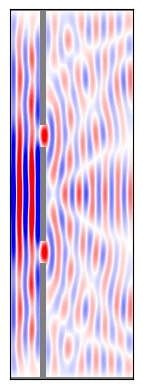

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

# Simulation parameters
N = 256   # Resolution
boxsize = 1.    # Box size
c = 1.    # Wave speed
t = 0     # Time
tEnd = 2.    # Stop time
plotRealTime = True  # Switch for plotting simulation in real-time

# Mesh
dx = boxsize / N
dt = (np.sqrt(2)/2) * dx / c
aX = 0   # x-axis
aY = 1   # y-axis
R = -1   # Right
L = 1    # Left
fac = dt**2 * c**2 / dx**2

xlin = np.linspace(0.5*dx, boxsize-0.5*dx, N)
Y, X = np.meshgrid(xlin, xlin)

# Generate Initial Conditions & mask
U = np.zeros((N, N))
mask = np.zeros((N, N), dtype=bool)
mask[0, :]  = True
mask[-1, :] = True
mask[:, 0]  = True
mask[:, -1] = True
mask[int(N/4):int(N*9/32), :N-1]     = True
mask[1:N-1, int(N*5/16):int(N*3/8)]  = False
mask[1:N-1, int(N*5/8):int(N*11/16)] = False
U[mask] = 0
Uprev = 1. * U

# Prepare the figure
fig = plt.figure(figsize=(18, 6), dpi=80)  # Adjust figsize to 18x6 for 3:1 aspect ratio
cmap = plt.cm.bwr
cmap.set_bad('gray')
outputCount = 1
time_step = 0

# Simulation Main Loop
while t < tEnd:
    
    # Calculate the Laplacian 
    ULX = np.roll(U, L, axis=aX)
    URX = np.roll(U, R, axis=aX)
    ULY = np.roll(U, L, axis=aY)
    URY = np.roll(U, R, axis=aY)
    
    laplacian = (ULX + ULY - 4*U + URX + URY)
    
    # Update U
    Unew = 2 * U - Uprev + fac * laplacian
    Uprev = 1. * U
    U = 1. * Unew
    
    # Apply boundary conditions (Dirichlet/inflow)
    U[mask] = 0
    U[0, :] = np.sin(20*np.pi*t) * np.sin(np.pi*xlin)**2
    
    # Update time
    t += dt
    
    # Plot the electric field every 10 time steps
    if time_step % 1 == 0:
        Uplot = 1. * U
        Uplot[mask] = np.nan
        ax = plt.gca()
        plt.imshow(Uplot.T, cmap=cmap)
        ax.invert_yaxis()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)    
        ax.set_aspect(3)  # Set aspect ratio to 3:1
        plt.clim(-3, 3)
        plt.pause(0.001)
        outputCount += 1
        clear_output(wait=True)
    
    time_step += 1